In [2]:
import numpy
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
def q(y, p, method=1):
    """
    Функция поиска значения квантиля с уровнем надежности р
    :param y: массив
    :param p: уровень надежности
    :param method: метод поиска h
    :return: квантиль с уровнем надежности р
    """
    N = y.shape[0]

    if method == 2:
        h = N * p + 1/2
    elif method == 3:
        h = (N + 1/3) * p + 1/3
    elif method == 4:
        h =( N + 1/4) * p + 3/8
    else:
        h = N * p

    q = y[int(np.floor(h))] + (h - np.floor(h)) *\
        (y[int(np.ceil(h))] - y[int(np.floor(h))])
    return q

In [5]:
def var(y, alfa):
    """
    Функция поиска значения критерия VaR
    :param y: массив
    :param alpha: уровень надежности
    :return: значение критерия VaR
    """
    return q(y, 1 - alfa)

In [35]:
def cvar_aver(y, alpha):
    """
    Функция поиска значения критерия CVaR
    :param y: массив
    :param alpha: уровень надежности
    :return: значение критерия CVaR
    """
    N = y.shape[0]
    q_ = q(y, 1 - alpha)
    ar = y[y < q_]
    l = ar.shape[0]

    num = np.sum(ar * 1 / N)
    denum = l / N

    return np.average(y[y < q_])

In [6]:
def cvar(y, alpha):
    """
    Функция поиска значения критерия CVaR
    :param y: массив
    :param alpha: уровень надежности
    :return: значение критерия CVaR
    """
    N = y.shape[0]
    q_ = q(y, 1 - alpha)
    ar = y[y < q_]
    l = ar.shape[0]

    num = np.sum(ar * 1 / N)
    denum = l / N

    return num / denum

In [7]:
def E(y):
    """
    Функция поиска выборочного среднего
    :param y: массив
    :return: выборочное среднее
    """
    return np.average(y)

In [8]:
def D(y):
    """
    Функция поиска выборочной дисперсии
    :param y: массив
    :return: диспресия
    """
    N = y.shape[0]
    EE = np.sum(y*y) / N
    return EE - E(y) ** 2

In [9]:
def r(x, y):
    """
    Функция поиска коэффициента корреляции между массивами х и у
    :param x: массив
    :param y: массив
    :return: коэффициент корреляции
    """
    return np.cov(x, y)[0][1]

In [10]:
def preproc(y):
    """
Функция получения доходностей из массива с ценами
    :param y: массив с ценами
    :return: массив с доходностями
    """
    return (y[1:] - y[:-1]) / y[:-1]

In [11]:
YNDX = pd.read_csv('YNDX_201016_211016.csv') # считываем данные из файла
MAGN = pd.read_csv('MAGN_201016_211016.csv')

In [12]:
YNDX

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>
0,YNDX,D,20201016,0,4530.0
1,YNDX,D,20201019,0,4457.0
2,YNDX,D,20201020,0,4340.0
3,YNDX,D,20201021,0,4410.2
4,YNDX,D,20201022,0,4455.0
...,...,...,...,...,...
250,YNDX,D,20211011,0,5622.2
251,YNDX,D,20211012,0,5549.0
252,YNDX,D,20211013,0,5553.8
253,YNDX,D,20211014,0,5518.0


In [13]:
y_start = YNDX['<CLOSE>'].to_numpy() # извлкеаем цены в массив
m_start = MAGN['<CLOSE>'].to_numpy()

In [14]:
m = preproc(m_start) # доходности
y = preproc(y_start)

In [15]:
print(m)

[-1.57480315e-03  2.09349011e-02  1.95224719e-02  3.48532856e-02
 -7.72097977e-03 -1.43547089e-02 -2.13692664e-02 -1.19610570e-02
  2.54786036e-02  2.10020590e-02  1.64022587e-02  2.38095238e-02
  2.58397933e-03  6.18556701e-03  3.84221311e-03 -1.02066854e-03
  4.90421456e-02 -5.35670806e-03  1.98286414e-02  3.21651464e-02
 -1.02325581e-02 -1.65648496e-02  5.25624179e-03 -7.01128936e-03
  3.35088559e-03  4.77099237e-03  9.49667616e-03  3.64534337e-03
  4.10076157e-03  1.47024504e-02  2.75988960e-03  3.87614679e-02
 -1.97615368e-02  1.00236513e-02  5.92105263e-02 -1.68438783e-03
 -8.75250448e-03  2.51063830e-02  1.34910751e-02  4.34159328e-02
  1.94308145e-02  1.65575664e-02  3.97727273e-03 -9.62082626e-03
 -9.90476190e-03  2.87610619e-02  2.33754091e-02  2.89629968e-02
  2.90356953e-02  8.37000604e-03 -2.58428889e-02 -1.90618412e-02
  1.96113549e-02  1.22958019e-03 -4.21052632e-03  1.63847780e-02
  3.90015601e-03 -1.81300181e-03 -5.37969209e-02  4.10420475e-02
 -1.22047590e-02  1.08444

In [16]:
y = np.copy(y[:200]) # оставляем по 200 значений
m = np.copy(m[:200])

m.shape[0]

200

In [17]:
print(m)


[-1.57480315e-03  2.09349011e-02  1.95224719e-02  3.48532856e-02
 -7.72097977e-03 -1.43547089e-02 -2.13692664e-02 -1.19610570e-02
  2.54786036e-02  2.10020590e-02  1.64022587e-02  2.38095238e-02
  2.58397933e-03  6.18556701e-03  3.84221311e-03 -1.02066854e-03
  4.90421456e-02 -5.35670806e-03  1.98286414e-02  3.21651464e-02
 -1.02325581e-02 -1.65648496e-02  5.25624179e-03 -7.01128936e-03
  3.35088559e-03  4.77099237e-03  9.49667616e-03  3.64534337e-03
  4.10076157e-03  1.47024504e-02  2.75988960e-03  3.87614679e-02
 -1.97615368e-02  1.00236513e-02  5.92105263e-02 -1.68438783e-03
 -8.75250448e-03  2.51063830e-02  1.34910751e-02  4.34159328e-02
  1.94308145e-02  1.65575664e-02  3.97727273e-03 -9.62082626e-03
 -9.90476190e-03  2.87610619e-02  2.33754091e-02  2.89629968e-02
  2.90356953e-02  8.37000604e-03 -2.58428889e-02 -1.90618412e-02
  1.96113549e-02  1.22958019e-03 -4.21052632e-03  1.63847780e-02
  3.90015601e-03 -1.81300181e-03 -5.37969209e-02  4.10420475e-02
 -1.22047590e-02  1.08444

In [18]:
import seaborn as sns

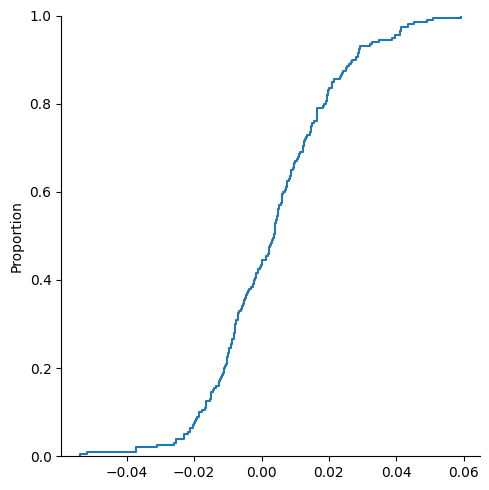

In [19]:
sns.displot(m, kind="ecdf")

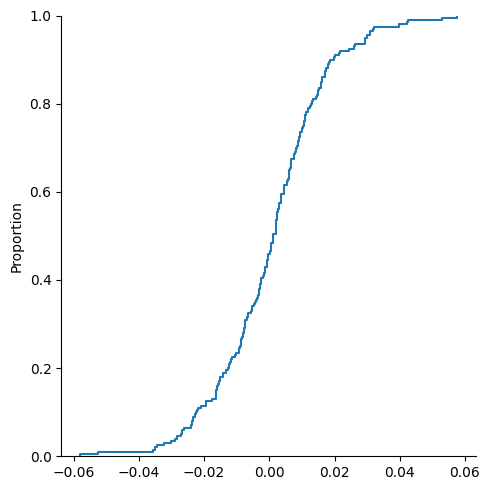

In [20]:
sns.displot(y, kind="ecdf")

Графики строится не совсем корректно, по оси абсцисс до 0 слева и от 1 вправо
соответственно должны быть лучи, уходящие на бесконечность.

Выборочный коэффициент корреляции доходностей

In [21]:
print('выборочный коэффициент корреляции доходностей ММК и Яндекса — ',\
      np.corrcoef(m, y)[0, 1])

выборочный коэффициент корреляции доходностей ММК и Яндекса —  0.08196490488167592


Выборочные средние значения доходностей

In [22]:
print('выборочное среднее значение доходностей ММК — ', np.average(m))
print('выборочное среднее значение доходностей Яндекса — ', np.average(y))

выборочное среднее значение доходностей ММК —  0.0035893666824829097
выборочное среднее значение доходностей Яндекса —  0.0005785485665870061


Выборочные дисперсии доходностей

In [23]:
print('выборочная дисперсия доходностей ММК — ', D(m))
print('выборочная дисперсия доходностей Яндекса — ', D(y))

выборочная дисперсия доходностей ММК —  0.0003387694959701702
выборочная дисперсия доходностей Яндекса —  0.00029457494963915825


Выборочные дисперсии доходностей

In [24]:
print('выборочная дисперсия доходностей ММК — ', np.var(m))
print('выборочная дисперсия доходностей Яндекса — ', np.var(y))

выборочная дисперсия доходностей ММК —  0.0003387694959701702
выборочная дисперсия доходностей Яндекса —  0.00029457494963915825


In [25]:
alpha = 0.98

In [26]:
y = np.copy(np.sort(y))
m = np.copy(np.sort(m))

In [28]:
print('VaR доходностей ММК — ', var(m, alpha))
print('VaR доходностей Яндекса — ', var(y, alpha))
if var(m, alpha) > var(y, alpha):
    print('VaR доходностей ММК больше, чем Яндекса')
elif var(m, alpha) < var(y, alpha):
    print('VaR доходностей ММК меньше, чем Яндекса')
else:
    print('VaR доходностей ММК и Яндекса равны')

VaR доходностей ММК —  -0.03099394371214822
VaR доходностей Яндекса —  -0.034547908232118715
VaR доходностей ММК больше, чем Яндекса


In [36]:
cvar_aver(y, alpha)

-0.043181167102082765

In [29]:
print('CVaR доходностей ММК — ', cvar(m, alpha))
print('CVaR доходностей Яндекса — ', cvar(y, alpha))
if cvar(m, alpha) > cvar(y, alpha):
    print('CVaR доходностей ММК больше, чем Яндекса')
elif cvar(m, alpha) < cvar(y, alpha):
    print('CVaR доходностей ММК меньше, чем Яндекса')
else:
    print('CVaR доходностей ММК и Яндекса равны')

CVaR доходностей ММК —  -0.04220639308528252
CVaR доходностей Яндекса —  -0.04318116710208276
CVaR доходностей ММК больше, чем Яндекса


In [30]:
def Y(m, y, part_m):
    return part_m * m + (1 - part_m) * y

scope = 10 + 1
max_var = -1000000
max_x_1 = -1
max_cvar = -1000000
max_x_1_cvar = -1
x_1 = np.linspace(0, 1, scope)
for i in range(scope):
    if var(Y(m, y, x_1[i]), alpha) > max_var:
        max_var = var(Y(m, y, x_1[i]), alpha)
        max_x_1 = x_1[i]
    print('VaR:', round(var(Y(m, y, x_1[i]), alpha), 4), 'ММК —',\
          round(x_1[i]*100), "%, Yandex —", round((1 - x_1[i])*100), '%')


for i in range(scope):
    print('CVaR:', round(cvar(Y(m, y, x_1[i]), alpha), 4), 'ММК —',\
          round(x_1[i]*100), "%, Yandex —", round((1 - x_1[i])*100), '%')

    if cvar(Y(m, y, x_1[i]), alpha) > max_cvar:
        max_cvar = cvar(Y(m, y, x_1[i]), alpha)
        max_x_1_cvar = x_1[i]
print('Оптимальный портфель по критерию VaR: \nММК —', round(max_x_1*100, 1),\
      "%, Yandex —", round((1 - max_x_1)*100, 1), '%')
print('Оптимальный портфель по критерию CVaR: \nММК —', round(max_x_1_cvar*100),\
      "%, Yandex —", round((1 - max_x_1_cvar)*100), '%')


# Y = x_j * m + (1 - x_j) * y

VaR: -0.0345 ММК — 0 %, Yandex — 100 %
VaR: -0.0342 ММК — 10 %, Yandex — 90 %
VaR: -0.0338 ММК — 20 %, Yandex — 80 %
VaR: -0.0335 ММК — 30 %, Yandex — 70 %
VaR: -0.0331 ММК — 40 %, Yandex — 60 %
VaR: -0.0328 ММК — 50 %, Yandex — 50 %
VaR: -0.0324 ММК — 60 %, Yandex — 40 %
VaR: -0.0321 ММК — 70 %, Yandex — 30 %
VaR: -0.0317 ММК — 80 %, Yandex — 20 %
VaR: -0.0313 ММК — 90 %, Yandex — 10 %
VaR: -0.031 ММК — 100 %, Yandex — 0 %
CVaR: -0.0432 ММК — 0 %, Yandex — 100 %
CVaR: -0.0431 ММК — 10 %, Yandex — 90 %
CVaR: -0.043 ММК — 20 %, Yandex — 80 %
CVaR: -0.0429 ММК — 30 %, Yandex — 70 %
CVaR: -0.0428 ММК — 40 %, Yandex — 60 %
CVaR: -0.0427 ММК — 50 %, Yandex — 50 %
CVaR: -0.0426 ММК — 60 %, Yandex — 40 %
CVaR: -0.0425 ММК — 70 %, Yandex — 30 %
CVaR: -0.0424 ММК — 80 %, Yandex — 20 %
CVaR: -0.0423 ММК — 90 %, Yandex — 10 %
CVaR: -0.0422 ММК — 100 %, Yandex — 0 %
Оптимальный портфель по критерию VaR: 
ММК — 100.0 %, Yandex — 0.0 %
Оптимальный портфель по критерию CVaR: 
ММК — 100 %, Yandex — 0 